In [3]:
import os
import cv2

In [4]:
from keras.preprocessing import image

In [5]:
data=[]
categories=["with_mask","without_mask"]
for category in categories:
    label=categories.index(category)
    path=os.path.join("train",category)
    
    for file in os.listdir(path):
        img_path=os.path.join(path,file)
        img=cv2.imread(img_path)
        img=cv2.resize(img,(224,224))
        data.append([img,label])

In [6]:
len(data)

2074

In [7]:
import random

In [8]:
random.shuffle(data)

In [9]:
X=[]
y=[]
for features,label in data:
    X.append(features)
    y.append(label)

In [10]:
len(X)

2074

In [11]:
len(y)

2074

In [12]:
import numpy as np

In [13]:
X=np.array(X)
y=np.array(y)

In [14]:
X.shape

(2074, 224, 224, 3)

In [15]:
y.shape

(2074,)

In [16]:
y

array([0, 1, 1, ..., 0, 1, 0])

In [17]:
X

array([[[[  0,   0,   0],
         [  1,   2,   1],
         [  4,   4,   3],
         ...,
         [197, 216, 231],
         [197, 216, 231],
         [197, 216, 231]],

        [[  0,   1,   0],
         [  1,   2,   1],
         [  2,   3,   2],
         ...,
         [196, 215, 231],
         [196, 215, 231],
         [196, 215, 231]],

        [[  0,   3,   0],
         [  0,   2,   0],
         [  0,   1,   0],
         ...,
         [196, 215, 230],
         [196, 215, 230],
         [196, 215, 230]],

        ...,

        [[ 13,  29,  65],
         [ 13,  29,  66],
         [ 14,  30,  67],
         ...,
         [182, 210, 227],
         [183, 210, 226],
         [184, 210, 226]],

        [[ 14,  30,  65],
         [ 14,  30,  66],
         [ 13,  30,  67],
         ...,
         [181, 210, 228],
         [182, 210, 227],
         [183, 210, 226]],

        [[ 14,  30,  66],
         [ 13,  30,  67],
         [ 13,  31,  68],
         ...,
         [180, 210, 229],
        

In [18]:
X=X/255

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [21]:
X_train.shape

(1659, 224, 224, 3)

In [22]:
X_test.shape

(415, 224, 224, 3)

In [23]:
from keras.applications.vgg16 import VGG16

In [24]:
vgg=VGG16()

In [25]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [26]:
from keras import Sequential

In [27]:
model=Sequential()

In [28]:
for layer in vgg.layers[:-1]:
    model.add(layer)

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [30]:
for layer in model.layers:
    layer.trainable=False

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [32]:
from keras.layers import Dense

In [33]:
model.add(Dense(1,activation="sigmoid"))

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [35]:
model.compile(optimizer="Adam",loss="binary_crossentropy",metrics=['accuracy'])

In [37]:
model.fit(X_train,y_train,epochs=4,validation_data=(X_test,y_test))

Epoch 1/4
52/52 [==============================] - 1891s 36s/step - loss: 0.4844 - accuracy: 0.8077 - val_loss: 0.3951 - val_accuracy: 0.8892
Epoch 2/4
52/52 [==============================] - 1757s 34s/step - loss: 0.3498 - accuracy: 0.8921 - val_loss: 0.3239 - val_accuracy: 0.8916
Epoch 3/4
52/52 [==============================] - 1741s 34s/step - loss: 0.3088 - accuracy: 0.8867 - val_loss: 0.2836 - val_accuracy: 0.9036
Epoch 4/4
52/52 [==============================] - 1748s 34s/step - loss: 0.2726 - accuracy: 0.9066 - val_loss: 0.2660 - val_accuracy: 0.9205


In [38]:
import pickle

In [39]:
with open("facemask.pkl","wb") as f:
    pickle.dump(model,f)

In [40]:
sample=cv2.imread("test/without_mask/3.png")

In [42]:
import matplotlib.pyplot as plt

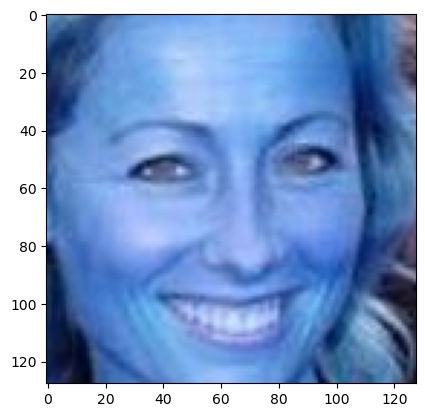

In [43]:
plt.imshow(sample)

In [44]:
sample=cv2.resize(sample,(224,224))

In [47]:
y_pred=model.predict(sample.reshape(1,224,224,3))

1/1 [==============================] - 2s 2s/step


In [48]:
y_pred

array([[0.9999403]], dtype=float32)

In [49]:
y_pred[0][0]

0.9999403

In [50]:
sample1=cv2.imread("test/with_mask/26.png")
sample1=cv2.resize(sample1,(224,224))
y_pred=model.predict(sample1.reshape(1,224,224,3))

1/1 [==============================] - 1s 1s/step


In [51]:
y_pred

array([[6.3121843e-06]], dtype=float32)

In [52]:
y_pred[0][0]

6.3121843e-06

In [53]:
if y_pred>0.5:
    print("without mask")
else:
    print("Mask")

Mask
